In [2]:
import pandas as pd
import numpy as np 
from collections import Counter as c 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
import pickle 
import warnings
warnings.filterwarnings('ignore')

## Reading the dataset

In [3]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='r-hxu6PVJlZrTcNDlrwjeAv4OzQVTpF_5ZddDv1ou0g-',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'ckd-donotdelete-pr-jzgsefejcafpqb'
object_key = 'chronickidneydisease.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
data.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [6]:
data.shape

(400, 26)

In [7]:
data.duplicated().sum()

0

## Understanding the datatype

In [8]:
data.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

## Descriptive statistics

In [10]:
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


## Dropping the column "id"

In [11]:
data.drop(["id"],axis=1,inplace=True)  # dropping the column "id"

In [12]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

## Renaming columns

In [15]:
data.columns = ['age','blood_pressure','specific_gravity','albumin','sugar','red_blood_cells','pus_cells',
              'pus_cell_clumps','bacteria','blood_glucose_random','blood_urea','serum_creatinine','sodium','potassium',
              'haemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count','hypertension',
              'diabetesmellitus','coronary_artery_disease','appetite','pedal_edema','anemia','class']
data.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cells', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

## Target column

In [16]:
data['class'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

## Rectifying target column

In [17]:
data['class']=data['class'].replace("ckd\t","ckd")
data['class'].unique()

array(['ckd', 'notckd'], dtype=object)

## Categorical columns


In [18]:
categorical_columns=set(data.dtypes[data.dtypes=='O'].index.values)  #fetching object or categorical columns
print(categorical_columns)

{'diabetesmellitus', 'bacteria', 'coronary_artery_disease', 'class', 'red_blood_cells', 'red_blood_cell_count', 'white_blood_cell_count', 'hypertension', 'anemia', 'pus_cells', 'packed_cell_volume', 'appetite', 'pedal_edema', 'pus_cell_clumps'}


In [ ]:
for i in categorical_columns:
    print("Columns : ",i)
    print(c[data[i]])
    print("*"*120+'\n')

## Removing columns which are not categorical

In [19]:
categorical_columns.remove('red_blood_cell_count')
categorical_columns.remove('packed_cell_volume')
categorical_columns.remove('white_blood_cell_count')
print(categorical_columns)

{'diabetesmellitus', 'bacteria', 'coronary_artery_disease', 'class', 'red_blood_cells', 'hypertension', 'anemia', 'pus_cells', 'appetite', 'pedal_edema', 'pus_cell_clumps'}


## Numerical columns

In [20]:
continuous_columns=set(data.dtypes[data.dtypes!='O'].index.values)    #fetching numerical columns
print(continuous_columns)

{'specific_gravity', 'blood_glucose_random', 'potassium', 'sugar', 'blood_urea', 'age', 'haemoglobin', 'blood_pressure', 'sodium', 'serum_creatinine', 'albumin'}


In [ ]:
for i in continuous_columns:
    print("Columns : ",i)
    print(c[data[i]])
    print("*"*120+'\n')

## Removing columns which are not numerical

In [21]:
continuous_columns.remove('specific_gravity')
continuous_columns.remove('albumin')
continuous_columns.remove('sugar')
print(continuous_columns)

{'blood_glucose_random', 'potassium', 'blood_urea', 'age', 'haemoglobin', 'blood_pressure', 'sodium', 'serum_creatinine'}


## Adding columns which we found continuous

In [22]:
continuous_columns.add('red_blood_cell_count')
continuous_columns.add('packed_cell_volume')
continuous_columns.add('white_blood_cell_count')
print(continuous_columns)


{'blood_glucose_random', 'potassium', 'red_blood_cell_count', 'blood_urea', 'age', 'white_blood_cell_count', 'haemoglobin', 'packed_cell_volume', 'blood_pressure', 'sodium', 'serum_creatinine'}


## Adding columns which we found categorical

In [23]:
categorical_columns.add('specific_gravity')
categorical_columns.add('albumin')
categorical_columns.add('sugar')
print(categorical_columns)

{'specific_gravity', 'diabetesmellitus', 'bacteria', 'coronary_artery_disease', 'class', 'red_blood_cells', 'sugar', 'hypertension', 'anemia', 'pus_cells', 'appetite', 'pedal_edema', 'pus_cell_clumps', 'albumin'}


## Rectifying the categorical column classes

In [24]:
data['coronary_artery_disease']=data.coronary_artery_disease.replace('\tno','no')
c(data['coronary_artery_disease'])

Counter({'no': 364, 'yes': 34, nan: 2})

In [25]:
data['diabetesmellitus']=data.diabetesmellitus.replace(to_replace={'\tyes':'yes','\tno':'no',' yes':'yes'})
c(data['diabetesmellitus'])

Counter({'yes': 137, 'no': 261, nan: 2})

## Analysing distribution of continuous columns

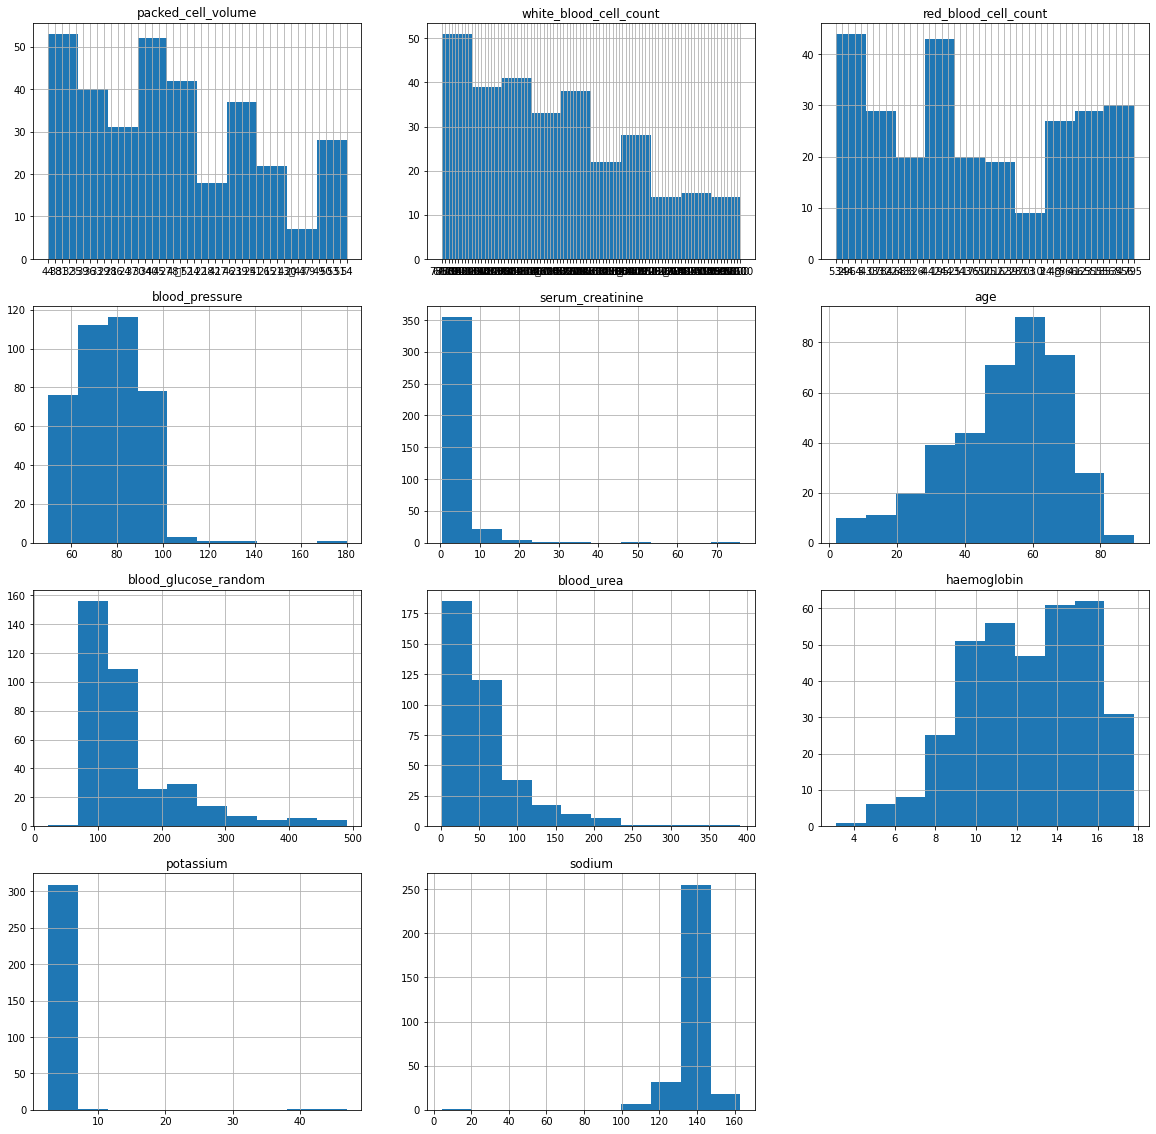

In [97]:
plt.figure(figsize=(20,20))
for i,feature in enumerate(continuous_columns):
    plt.subplot(4,3,i+1)      
    data[feature].hist()
    plt.title(feature)

## Analysing distribution of categorial columns


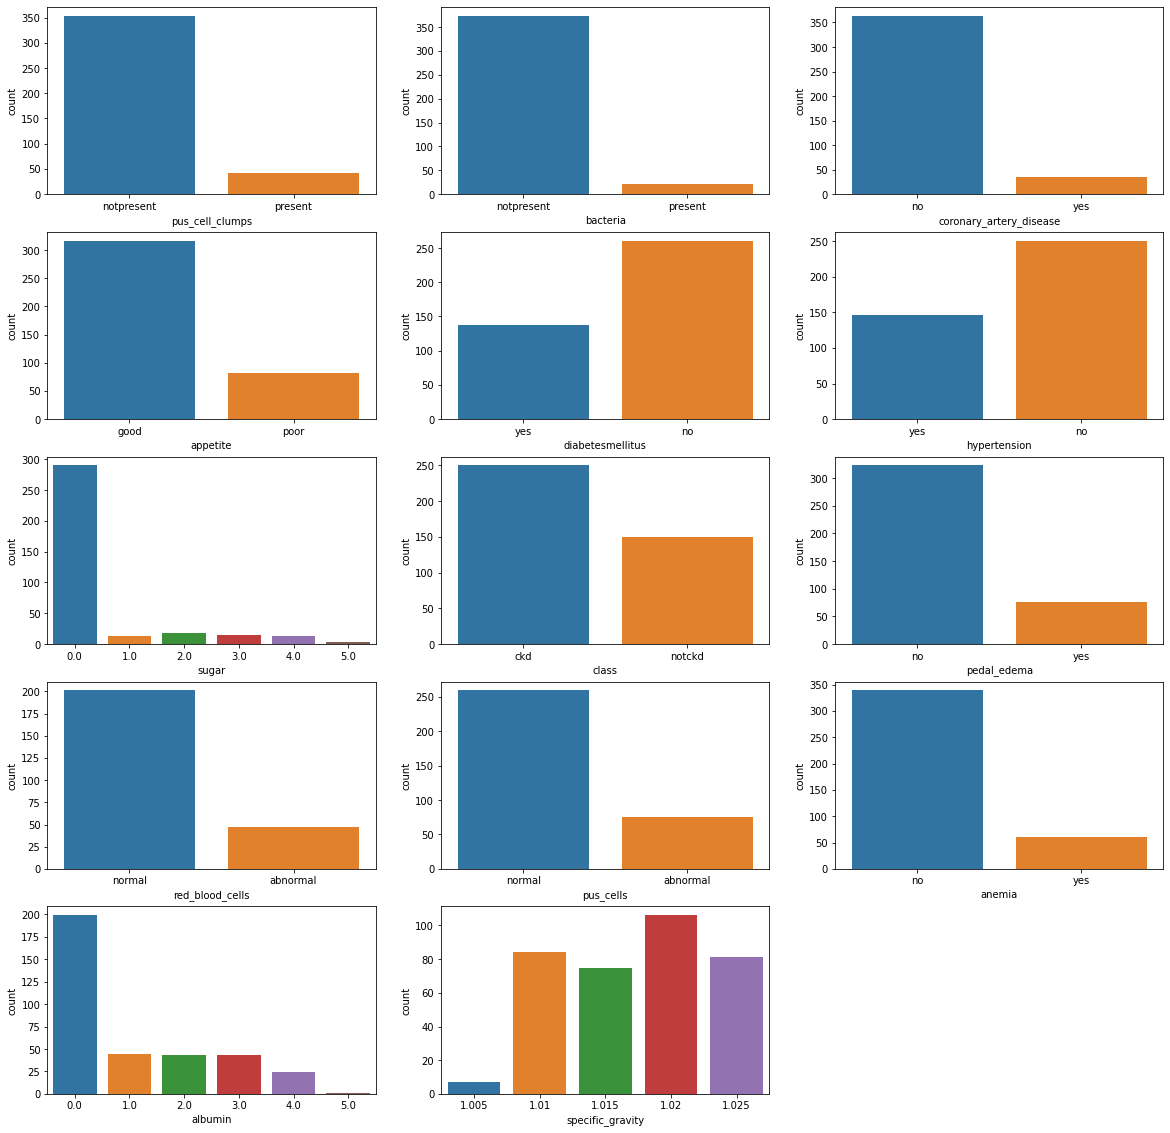

In [98]:
plt.figure(figsize=(20,20))

for i,feature in enumerate(categorical_columns):
    plt.subplot(5,3,i+1)
    sns.countplot(data[feature])

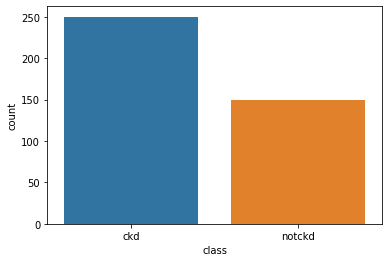

In [99]:
sns.countplot(data['class'])

## Correlation

In [26]:
data.corr()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928
blood_pressure,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540
specific_gravity,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582
albumin,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632
sugar,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775
blood_glucose_random,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189
blood_urea,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360
serum_creatinine,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670
sodium,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183
potassium,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746


<AxesSubplot:>

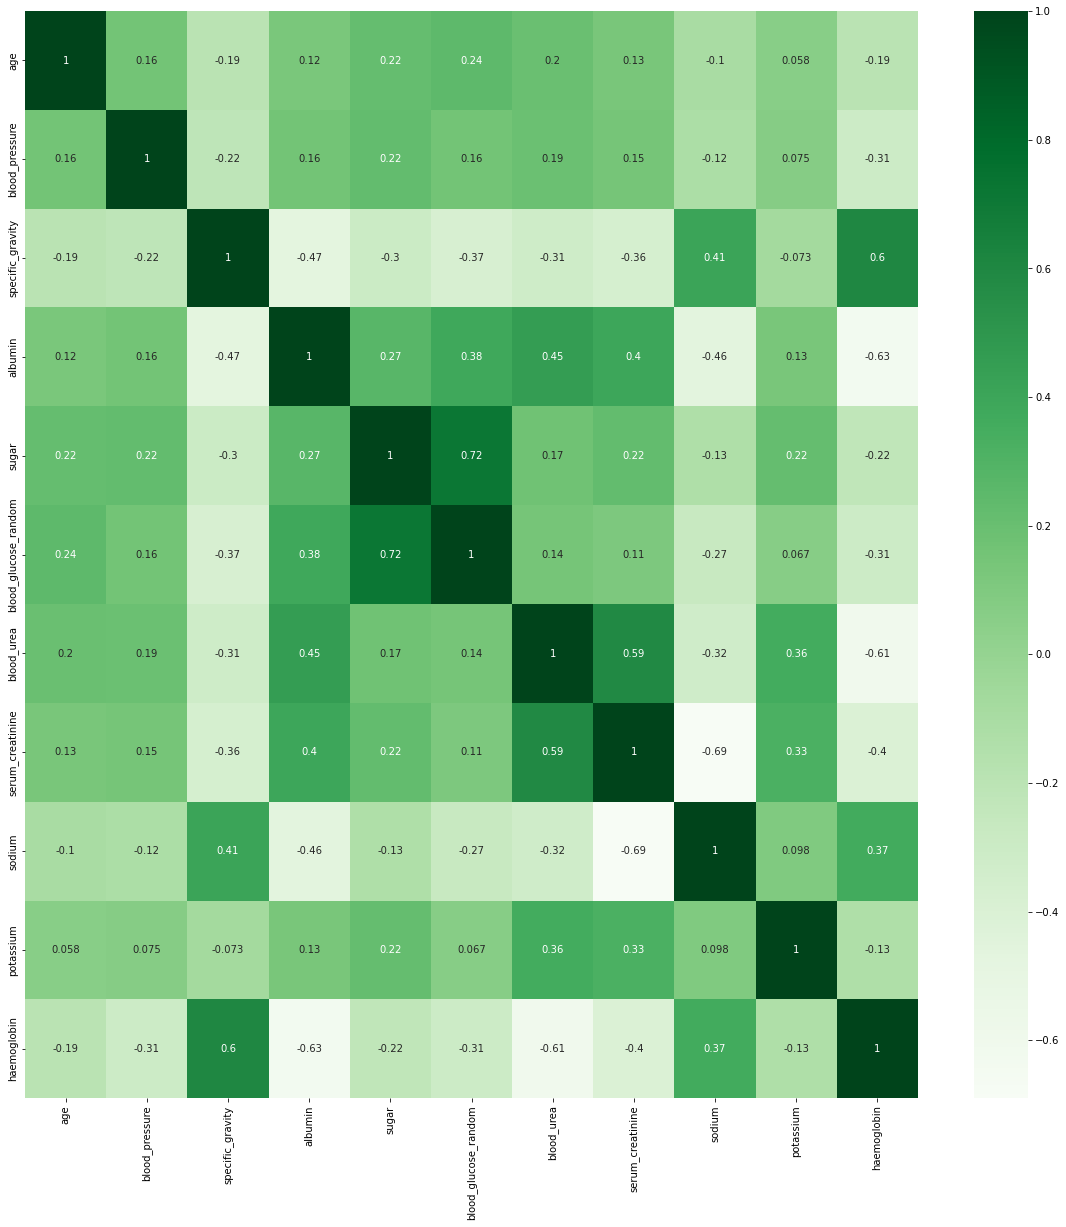

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),cmap="Greens",annot=True)

## Null values

In [28]:
data.isnull().any()

age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cells                   True
pus_cell_clumps             True
bacteria                    True
blood_glucose_random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
haemoglobin                 True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetesmellitus            True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
class                      False
dtype: bool

In [29]:
data.isnull().sum() 

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cells                   65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetesmellitus             2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [30]:
data.packed_cell_volume=pd.to_numeric(data.packed_cell_volume,errors='coerce')
data.white_blood_cell_count=pd.to_numeric(data.white_blood_cell_count,errors='coerce')
data.red_blood_cell_count=pd.to_numeric(data.red_blood_cell_count,errors='coerce')


## Handling continuous/numeric columns null values

In [31]:
data['blood_glucose_random'].fillna(data['blood_glucose_random'].mean(),inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)
data['haemoglobin'].fillna(data['haemoglobin'].mean(),inplace=True)
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(),inplace=True)
data['potassium'].fillna(data['potassium'].mean(),inplace=True)
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(),inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True)
data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean(),inplace=True)


## Handling continuous columns null values

In [32]:
data['age'].fillna(data['age'].mode()[0],inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)
data['pus_cells'].fillna(data['pus_cells'].mode()[0],inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0],inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0],inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True)
data['specific_gravity'].fillna(data['specific_gravity'].mode()[0],inplace=True)

## Checking if there are any null values after resolving it

In [33]:
data.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cells                  0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetesmellitus           0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

## Label encoding

In [34]:

for i in categorical_columns:
    print("LABEL ENCODING OF:",i)
    Le=LabelEncoder()
    print(c(data[i]))
    data[i]=Le.fit_transform(data[i])
    print(c(data[i]))
    print("*"*100)

LABEL ENCODING OF: specific_gravity
Counter({1.02: 153, 1.01: 84, 1.025: 81, 1.015: 75, 1.005: 7})
Counter({3: 153, 1: 84, 4: 81, 2: 75, 0: 7})
****************************************************************************************************
LABEL ENCODING OF: diabetesmellitus
Counter({'no': 263, 'yes': 137})
Counter({0: 263, 1: 137})
****************************************************************************************************
LABEL ENCODING OF: bacteria
Counter({'notpresent': 378, 'present': 22})
Counter({0: 378, 1: 22})
****************************************************************************************************
LABEL ENCODING OF: coronary_artery_disease
Counter({'no': 366, 'yes': 34})
Counter({0: 366, 1: 34})
****************************************************************************************************
LABEL ENCODING OF: class
Counter({'ckd': 250, 'notckd': 150})
Counter({0: 250, 1: 150})
************************************************************************

## Creating dependent and independent variables

In [35]:
selected_columns=['red_blood_cells','pus_cells','blood_glucose_random','blood_urea','pedal_edema','anemia',
                  'diabetesmellitus','coronary_artery_disease']
x=pd.DataFrame(data,columns=selected_columns)
y=pd.DataFrame(data,columns=['class'])
print(x.shape)
print(y.shape)

(400, 8)
(400, 1)


## Splitting the data into train and test

In [36]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(320, 8)
(320, 1)
(80, 8)
(80, 1)


## Build a machine learning model

In [37]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
lgr.fit(x_train, y_train)

LogisticRegression()

In [38]:
!pip install ibm_watson_machine_learning

In [39]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
                  "url":"https://us-south.ml.cloud.ibm.com",
                  "apikey":"hSkuQmck2PyDdxU8ArFuKk6fWcQgVmt3JZNVmDwRhojl"
                }
client=APIClient(wml_credentials)

In [40]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"]==space_name)['metadata']['id'])

In [42]:
space_uid = guid_from_space_name(client,'models')
print("Space UID = "+ space_uid)

Space UID = 1a785f4a-e8c7-498e-b14a-6c3c0265e379


In [43]:
client.set.default_space(space_uid)

'SUCCESS'

In [59]:
client.software_specifications.list(limit=100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [70]:
software_spec_uid=client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [71]:
model_details = client.repository.store_model(model=lgr,meta_props={
client.repository.ModelMetaNames.NAME:"CKD",
client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
})
model_id=client.repository.get_model_uid(model_details)


This method is deprecated, please use get_model_id()


In [72]:
model_id

'c42583c9-3c0d-4533-a569-712c25551f27'

In [73]:
y_pred=lgr.predict(x_test)
y_pred1=lgr.predict([[129,99,1,0,0,1,0,1]])
print(y_pred)
c(y_pred)

[0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1
 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1
 0 1 0 1 1 0]


Counter({0: 48, 1: 32})

## Accuracy score

In [119]:
accuracy_score(y_test,y_pred)

0.925

## Confusion matrix

In [120]:
confusion_mat = confusion_matrix(y_test,y_pred)
confusion_mat

array([[48,  6],
       [ 0, 26]])

## Dumping our model into pickle form

In [123]:
pickle.dump(lgr,open('CKD.pkl','wb'))